In [1]:
import xgcm
import xarray as xr
import numpy as np
from xbasin import remap_vertical, compute_moc
from matplotlib import pyplot as plt
import cmocean as cm

In [2]:
#ds = xr.open_dataset('data/nemo_output_ex.nc')

In [3]:
from xnemogcm import open_nemo_and_domain_cfg

ds = open_nemo_and_domain_cfg(datadir='/home/romain/Documents/Education/PhD/Courses/2019-OC6310/Project/Experiments/EXP_eos00/Rawdata')

In [4]:

metrics_fr = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w']
}
metrics_to = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t_1d', 'e3w_1d']
}
grid = xgcm.Grid(ds, periodic=False, metrics=metrics_fr)


print(ds)

<xarray.Dataset>
Dimensions:        (axis_nbounds: 2, t: 5, x_c: 21, x_f: 21, y_c: 40, y_f: 40, z_c: 36, z_f: 36)
Coordinates:
  * z_f            (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 31.5 32.5 33.5 34.5
  * t              (t) object 7756-01-01 00:00:00 ... 7796-01-01 00:00:00
  * x_c            (x_c) int64 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19 20
  * y_c            (y_c) int64 0 1 2 3 4 5 6 7 8 ... 31 32 33 34 35 36 37 38 39
  * z_c            (z_c) int64 0 1 2 3 4 5 6 7 8 ... 27 28 29 30 31 32 33 34 35
  * x_f            (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 17.5 18.5 19.5 20.5
  * y_f            (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 36.5 37.5 38.5 39.5
Dimensions without coordinates: axis_nbounds
Data variables:
    depthw_bounds  (z_f, axis_nbounds) float32 ...
    t_bounds       (t, axis_nbounds) object ...
    woce           (t, z_f, y_c, x_c) float32 ...
    e3w            (t, z_f, y_c, x_c) float32 ...
    deptht_bounds  (z_c, axis_nbounds) float32 ...
    e3t         

In [5]:
a0 = 1.655e-1
b0 = 7.6554e-1
l1 = 5.9520e-2
l2 = 0#5.4914e-4
nu = 0 #2.4341e-3
mu1 = 1.4970e-4
mu2 = 0 #1.1090e-5
T0 = 10
S0 = 35
rho0 = 1026
g = 9.81

def compute_rho(T, S, z, lambda1=5.9520e-2):
    if lambda1 is not None:
        l1 = lambda1
    Ta = T - T0
    Sa = S - S0
    rho = rho0 \
         - a0 * (1 + 0.5 * l1 * Ta + mu1 * z) * Ta \
         + b0 * (1 - 0.5 * l2 * Sa - mu2 * z) * Sa \
         - nu * Ta * Sa
    return rho

def compute_b(T, S, z, lambda1=5.9520e-2):
    return g * (rho0 - compute_rho(T, S, z, lambda1=lambda1)) / rho0

def compute_alpha(T, S, z, lambda1=5.9520e-2):
    if lambda1 is not None:
        l1 = lambda1
        print(l1)
    Ta = T - T0
    Sa = S - S0
    alpha = 1/rho0 * (a0 * (1 + l1 * Ta + mu1 * z) - nu * Sa)
    return alpha

def compute_beta(T, S, z):
    Ta = T - T0
    Sa = S - S0
    beta = 1/rho0 * b0 * (1 - l2 * Sa - mu2 * z)
    return beta

In [6]:
#ds.gdept_0[:,0] = ds.gdept_0[:,1]

<xarray.DataArray (t: 5, z_c: 36, y_c: 40, x_c: 21)>
array([[[[        nan, 23.78204124, 23.79889564, ..., 24.66232078,
                  nan,         nan],
         [        nan, 23.72698692, 23.81822497, ..., 24.81489583,
                  nan,         nan],
         [        nan, 23.78204124, 23.79889564, ..., 24.66232078,
                  nan,         nan],
         ...,
         [        nan, 27.55265253, 27.55184141, ..., 27.74407789,
                  nan,         nan],
         [        nan, 27.53521865, 27.53316736, ..., 27.70329823,
                  nan,         nan],
         [        nan,  0.45256074,  0.45256074, ...,  0.45256074,
                  nan,         nan]],

        [[        nan, 23.78204124, 23.79889564, ..., 24.73851578,
                  nan,         nan],
         [        nan, 23.72698692, 23.81822497, ..., 25.13576841,
                  nan,         nan],
         [        nan, 23.78204124, 23.79889564, ..., 24.73851578,
                  nan,         nan],
         ...,
         [        nan, 27.55507161, 27.55443836, ..., 27.74603581,
                  nan,         nan],
         [        nan, 27.53764827, 27.53583524, ..., 27.70562869,
                  nan,         nan],
         [        nan,  0.45503827,  0.45503827, ...,  0.45503827,
                  nan,         nan]],

        [[        nan, 23.78204124, 23.79889564, ..., 24.97777431,
                  nan,         nan],
         [        nan, 23.72698692, 23.81822497, ..., 25.25403011,
                  nan,         nan],
         [        nan, 23.78204124, 23.79889564, ..., 24.97777431,
                  nan,         nan],
         ...,
         [        nan, 27.55759599, 27.55691838, ..., 27.74795385,
                  nan,         nan],
         [        nan, 27.5401905 , 27.53833658, ..., 27.7078631 ,
                  nan,         nan],
         [        nan,  0.45751581,  0.45751581, ...,  0.45751581,
                  nan,         nan]],

        ...,

        [[        nan, 28.37340334, 28.38017188, ..., 28.38025681,
                  nan,         nan],
         [        nan, 28.38723914, 28.38723499, ..., 28.38731055,
                  nan,         nan],
         [        nan, 28.37340334, 28.38017188, ..., 28.38025681,
                  nan,         nan],
         ...,
         [        nan, 28.12778587, 28.19899978, ..., 28.19826352,
                  nan,         nan],
         [        nan, 28.09561622, 28.12740363, ..., 28.13039041,
                  nan,         nan],
         [        nan,  0.82939761,  0.77288603, ...,  0.77288603,
                  nan,         nan]],

        [[        nan, 28.4496401 , 28.45726494, ..., 28.45754508,
                  nan,         nan],
         [        nan, 28.46523663, 28.46523113, ..., 28.46550677,
                  nan,         nan],
         [        nan, 28.4496401 , 28.45726494, ..., 28.45754508,
                  nan,         nan],
         ...,
         [        nan, 28.17159031, 28.25208683, ..., 28.25117744,
                  nan,         nan],
         [        nan, 28.13530524, 28.17117491, ..., 28.17482493,
                  nan,         nan],
         [        nan,  0.87032789,  0.80645207, ...,  0.80645207,
                  nan,         nan]],

        [[        nan, 28.4496401 , 28.45726494, ..., 28.45754508,
                  nan,         nan],
         [        nan, 28.46523663, 28.46523113, ..., 28.46550677,
                  nan,         nan],
         [        nan, 28.4496401 , 28.45726494, ..., 28.45754508,
                  nan,         nan],
         ...,
         [        nan, 28.17159031, 28.25208683, ..., 28.25117744,
                  nan,         nan],
         [        nan, 28.13530524, 28.17117491, ..., 28.17482493,
                  nan,         nan],
         [        nan,  0.91378718,  0.84206279, ...,  0.84206279,
                  nan,         nan]]],


       [[[        nan, 23.78206638, 23.79889925, ..., 24.66230564,
                  nan,  

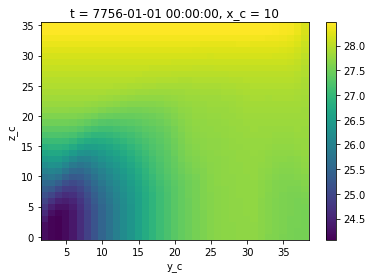

In [7]:
rho = compute_rho(ds.thetao, ds.so, ds.gdept_0, lambda1=4.9520e-2) - 1000


#crd_T[:,-1] = crd_T[:,-2]
# Try to stabilize the water column
for i in range(len(ds.z_c)-1):
    diff = (rho[:,i+1] - rho[:,i])
    mask = diff <= 0
    rho[:,i+1] -= mask * diff
    if mask.sum():
        #print(i)
        #print(np.min(diff).values)
        pass


ds['sigma'] = rho
rho[{'x_c':[0,-1,-2]}] = np.nan
rho[0,:,2:-1,10].plot()
rho

We will use the following formula to compute the MOC streamfunction, using density as the tracer C.

$$\psi_{C y}=\iint_{C^{\prime} \leq C} v d x d z$$

### We create a new grid, based on constant levels of density

In [8]:
# Vertical (density)
s_min = np.int(ds['sigma'].values.flatten()[ds['sigma'].values.flatten() > 5].min())
s_max = np.int(ds['sigma'].values.flatten()[ds['sigma'].values.flatten() > 5].max()) + 1

print('(s_min, s_max)', (s_min, s_max))
dd = 0.1 #0.05
N = np.floor((s_max-s_min)/dd) + 1
#crd_T_new = np.arange(N) * dd + s_min
#crd_W_new = crd_T_new - dd/2

s_c = np.arange(N)
s_c = xr.DataArray(s_c, coords=[('s_c',s_c)])
s_c.attrs = ds.z_c.attrs
s_c.attrs['axis'] = 'S'
s_f = np.arange(N) - 0.5
s_f = xr.DataArray(s_f, coords=[('s_f',s_f)])
s_f.attrs = ds.z_f.attrs
s_f.attrs['axis'] = 'S'

grhot_0 = s_c * dd + s_min
grhow_0 = s_f * dd + s_min

e3t_1d = xr.DataArray(dd)
e3w_1d = xr.DataArray(dd)


ds['e3t_s_1d'] = e3t_1d
ds['e3w_s_1d'] = e3w_1d
ds['grhot_0'] = grhot_0
ds['grhow_0'] = grhow_0
ds['s_c'] = s_c
ds['s_f'] = s_f


(s_min, s_max) (23, 29)


<ipython-input-8-1143b70c4eff>:2: RuntimeWarning: invalid value encountered in greater
  s_min = np.int(ds['sigma'].values.flatten()[ds['sigma'].values.flatten() > 5].min())
<ipython-input-8-1143b70c4eff>:3: RuntimeWarning: invalid value encountered in greater
  s_max = np.int(ds['sigma'].values.flatten()[ds['sigma'].values.flatten() > 5].max()) + 1


In [9]:
rho_w = grid.interp(rho, axis='Z', boundary='extend')
ds['sigmaw'] = rho_w

### Scale factors

In [10]:
e3w = grid.diff(rho, axis='Z', boundary='extend')
e3t = grid.diff(rho_w, axis='Z', boundary='extend')
ds['e3t_sigma0'] = e3t
ds['e3w_sigma0'] = e3w

We actualize the grid with this new density coordinate

In [11]:
'''
metrics_sigma_fr = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t_sigma0', 'e3w_sigma0']
}
grid_sigma_fr = xgcm.Grid(ds, metrics=metrics_sigma_fr, periodic=False)

metrics_sigma_to = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('S',): ['e3t_s_1d', 'e3w_s_1d']
}
grid_sigma_to = xgcm.Grid(ds, metrics=metrics_sigma_to, periodic=False)
'''
metrics = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w'],
    ('S',): ['e3t_s_1d', 'e3w_s_1d']
}
ds.e1v[{'x_c':[0,-2,-1]}] = 0 * np.nan
grid = xgcm.Grid(ds, periodic=False, metrics=metrics)

In [12]:
#ds.grhot_0

First integrate along z, for density values C' smaller than C.

$$\int_{C^{\prime} \leq C} v d z$$

Now we integrate along x.

$$\int \text{int_v_d} d x$$

In [13]:
int_v_dz = np.NaN * ds['s_f'] * ds.vo.isel({'z_c':0})

ds['sigma_V'] = grid.interp(ds['sigma'], axis='Y', boundary='extend')

In [14]:
%%time

for (i, sigma) in enumerate(ds.grhow_0):
    mask = (ds.sigma_V <= sigma)
    int_v_dz[{'s_f':i}] = (ds.vo * ds.e3v * mask).sum(dim='z_c')
    
psi = grid.integrate(int_v_dz, axis='X') * 1e-6

CPU times: user 396 ms, sys: 0 ns, total: 396 ms
Wall time: 395 ms


In [15]:
%%time
density_levels = ds.grhow_0

mask = (ds.sigma_V <= density_levels)
vertical_int = grid.integrate(ds.vo * mask, axis='Z')
psi = grid.integrate(vertical_int, axis='X') * 1e-6
# integrate from bottom
psi = psi - psi[{'s_f':-1}]

CPU times: user 50.9 ms, sys: 7.41 ms, total: 58.3 ms
Wall time: 57.6 ms


In [16]:
assert(((ds.vo * ds.e3v * mask).sum(dim='z_c') == grid.integrate(ds.vo * mask, axis='Z')).all())
print(np.abs(vertical_int - int_v_dz).max())

<xarray.DataArray ()>
array(0.)
Coordinates:
    z_c      int64 0


Using xgcm in one line, integration from the bottom

In [17]:
%%time
density_levels = ds.grhow_0
mask = (ds.sigma_V >= density_levels)
psi = -grid.integrate(grid.integrate(ds.vo * mask, axis='Z'), axis='X') * 1e-6

CPU times: user 52.5 ms, sys: 0 ns, total: 52.5 ms
Wall time: 51.6 ms


In [18]:
mask

<xarray.DataArray (t: 5, z_c: 36, y_f: 40, x_c: 21, s_f: 61)>
array([[[[[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         ...,

         [[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]]],


        [[[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         ...,

         [[False, False, False, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          [ True,  True,  True, ..., False, False, False],
          ...,
          [ True,  True,  True, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
    

We compute the density at the bottom of the MLD

In [19]:
%%time
index = (ds.gdepw_0 <= ds.mldr10_1).sum(dim='z_f')
sigma_mld = ds.mldr10_1.copy(deep=True)

for i in range(len(ds.x_c)):
    for j in range(len(ds.y_c)):
        for t in range(len(ds.t)):
            sigma_mld[{'x_c':i, 'y_c':j, 't':t}] = ds['sigma'].isel({'x_c':i, 'y_c':j, 't':t, 'z_c':index.isel({'x_c':i, 'y_c':j, 't':t})})

CPU times: user 4.4 s, sys: 0 ns, total: 4.4 s
Wall time: 4.4 s


Text(0.5, 0, 'latitude')

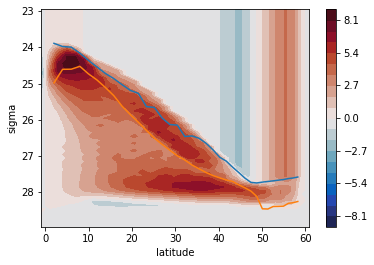

In [20]:
vmax = 10

plt.contourf(ds.gphif.isel({'x_f':0}), ds.grhow_0, psi[{'t':0}].T, cmap=cm.cm.balance, levels=np.linspace(-9,9,21))
plt.colorbar()

plt.plot(ds.gphit.isel({'x_c':0, 'y_c':slice(2,-2)}), sigma_mld.isel({'t':0, 'y_c':slice(2,-2), 'x_c':slice(2,-2)}).min(dim='x_c'))
plt.plot(ds.gphit.isel({'x_c':0, 'y_c':slice(2,-2)}), sigma_mld.isel({'t':0, 'y_c':slice(2,-2), 'x_c':slice(2,-2)}).max(dim='x_c'))
#plt.plot(ds.gphit.isel({'x_c':0, 'y_c':slice(2,-2)}), ds.sigma0.isel({'t':0,'z_c':0, 'y_c':slice(2,-2), 'x_c':slice(2,-2)}).min(dim='x_c'))
plt.gca().invert_yaxis()

plt.ylabel('sigma')
plt.xlabel('latitude')

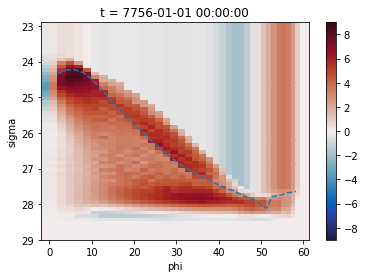

In [21]:
psi.coords['sigma'] = ds.grhow_0
psi.coords['phi'] = ds.gphif.isel({'x_f':0}).drop_vars('x_f')

psi[0].T.plot.pcolormesh(x='phi', y='sigma', cmap=cm.cm.balance, vmin=-9, vmax=9)
plt.plot(ds.gphit.isel({'x_c':0, 'y_c':slice(2,-2)}), sigma_mld.isel({'t':0, 'y_c':slice(2,-2), 'x_c':slice(2,-2)}).mean(dim='x_c'), '--')
plt.gca().invert_yaxis()

# Convert to depth coordinates for the plotting

We want to get the zonal mean depth for each density

## Using the remapping method

In [29]:
ds['sigmawv'] = grid.interp(ds.sigmaw, axis='Y', boundary='extend')

In [30]:
from xbasin import remap_vertical

In [31]:
metrics_fr = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w']
}
metrics_to = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t_1d', 'e3w_1d']
}
grid_fr = xgcm.Grid(ds, periodic=False, metrics=metrics_fr)
grid_to = xgcm.Grid(ds, periodic=False, metrics=metrics_to)

In [32]:
sigmawv_to = remap_vertical(
    ds.sigmawv,
    grid_fr,
    grid_to,
    axis='Z'
).compute()

KeyError: "Unable to find any combinations of metrics for array dims {'z_f', 'x_c', 't', 'y_f'} and axes 'Z'"

## Other method to compute average depth of iso density

In [22]:
%%time
mean_depth_isopycnal = ds.grhow_0*np.NaN*ds.vos.isel({'x_c':0}).drop_vars('x_c')

ds_density = ds['sigma_V']

for (i,sigma) in enumerate(ds.grhow_0):
    upper_t_point_index = xr.where((ds_density <= sigma).sum(dim='z_c')>35, 35, (ds_density <= sigma).sum(dim='z_c'))
    upper_t_point_index = xr.where(sigma < ds_density.isel({'z_c':slice(None,-1)}).min(dim='z_c'), 0, upper_t_point_index)
    upper_t_point_index = xr.where(sigma > ds_density.isel({'z_c':slice(None,-1)}).max(dim='z_c'), 35, upper_t_point_index)
    
    lower_t_point_index = xr.where(35-(ds_density >= sigma).sum(dim='z_c')<0, 0, 35-(ds_density >= sigma).sum(dim='z_c'))
    lower_t_point_index = xr.where(sigma < ds_density.isel({'z_c':slice(None,-1)}).min(dim='z_c'), 0, lower_t_point_index)
    lower_t_point_index = xr.where(sigma > ds_density.isel({'z_c':slice(None,-1)}).max(dim='z_c'), 35, lower_t_point_index)
    
    depth_up = grid.interp(ds.gdept_0, axis='Y', boundary='extend').isel({'z_c':upper_t_point_index})
    depth_down = grid.interp(ds.gdept_0, axis='Y', boundary='extend').isel({'z_c':lower_t_point_index})
    mean_depth_isopycnal[i] = grid.average((depth_up + depth_down)/2, axis='X')
    #mean_depth_isopycnal[i] = ((depth_up + depth_down)/2).isel({'t':0, 'x_c':slice(1,-1)}).mean(dim='x_c')

/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN sl

CPU times: user 985 ms, sys: 7.82 ms, total: 993 ms
Wall time: 976 ms


/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/romain/.local/share/virtualenvs/xbasin-waTYILeg/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN sl

In [23]:
ds_density

<xarray.DataArray 'sigma_V' (t: 5, z_c: 36, y_f: 40, x_c: 21)>
array([[[[        nan, 23.75451408, 23.8085603 , ..., 24.73860831,
                  nan,         nan],
         [        nan, 23.75451408, 23.8085603 , ..., 24.73860831,
                  nan,         nan],
         [        nan, 23.83444435, 23.83477492, ..., 24.57043256,
                  nan,         nan],
         ...,
         [        nan, 27.54393559, 27.54250438, ..., 27.72368806,
                  nan,         nan],
         [        nan, 13.99388969, 13.99286405, ..., 14.07792948,
                  nan,         nan],
         [        nan,  0.45256074,  0.45256074, ...,  0.45256074,
                  nan,         nan]],

        [[        nan, 23.75451408, 23.8085603 , ..., 24.93714209,
                  nan,         nan],
         [        nan, 23.75451408, 23.8085603 , ..., 24.93714209,
                  nan,         nan],
         [        nan, 23.83444435, 23.83477492, ..., 24.61868841,
                  nan,         nan],
         ...,
         [        nan, 27.54635994, 27.5451368 , ..., 27.72583225,
                  nan,         nan],
         [        nan, 13.99634327, 13.99543676, ..., 14.08033348,
                  nan,         nan],
         [        nan,  0.45503827,  0.45503827, ...,  0.45503827,
                  nan,         nan]],

        [[        nan, 23.75451408, 23.8085603 , ..., 25.11590221,
                  nan,         nan],
         [        nan, 23.75451408, 23.8085603 , ..., 25.11590221,
                  nan,         nan],
         [        nan, 23.83444435, 23.83477492, ..., 24.76664344,
                  nan,         nan],
         ...,
         [        nan, 27.54889325, 27.54762748, ..., 27.72790847,
                  nan,         nan],
         [        nan, 13.99885316, 13.99792619, ..., 14.08268945,
                  nan,         nan],
         [        nan,  0.45751581,  0.45751581, ...,  0.45751581,
                  nan,         nan]],

        ...,

        [[        nan, 28.38032124, 28.38370344, ..., 28.38378368,
                  nan,         nan],
         [        nan, 28.38032124, 28.38370344, ..., 28.38378368,
                  nan,         nan],
         [        nan, 28.35509314, 28.37083602, ..., 28.37091981,
                  nan,         nan],
         ...,
         [        nan, 28.11170104, 28.1632017 , ..., 28.16432697,
                  nan,         nan],
         [        nan, 14.46250691, 14.45014483, ..., 14.45163822,
                  nan,         nan],
         [        nan,  0.82939761,  0.77288603, ...,  0.77288603,
                  nan,         nan]],

        [[        nan, 28.45743837, 28.46124803, ..., 28.46152593,
                  nan,         nan],
         [        nan, 28.45743837, 28.46124803, ..., 28.46152593,
                  nan,         nan],
         [        nan, 28.42898995, 28.4467243 , ..., 28.44700967,
                  nan,         nan],
         ...,
         [        nan, 28.15344778, 28.21163087, ..., 28.21300119,
                  nan,         nan],
         [        nan, 14.50281657, 14.48881349, ..., 14.4906385 ,
                  nan,         nan],
         [        nan,  0.87032789,  0.80645207, ...,  0.80645207,
                  nan,         nan]],

        [[        nan, 28.45743837, 28.46124803, ..., 28.46152593,
                  nan,         nan],
         [        nan, 28.45743837, 28.46124803, ..., 28.46152593,
                  nan,         nan],
         [        nan, 28.42898995, 28.4467243 , ..., 28.44700967,
                  nan,         nan],
         ...,
         [        nan, 28.15344778, 28.21163087, ..., 28.21300119,
                  nan,         nan],
         [        nan, 14.52454621, 14.50661885, ..., 14.50844386,
                  nan,         nan],
         [        nan,  0.91378718,  0.84206279, ...,  0.84206279,
                  nan,         nan]]],


       [[[        nan, 23.75453225, 23.80856371, ..., 24.73859379,
              

In [24]:
mean_depth_isopycnal[{'s_f':20,'t':0}]

<xarray.DataArray (y_f: 40)>
array([  63.29151191,   63.29151191,   71.59898786,   80.28528318,
         88.74210976,   94.77178276,   89.92307296,   69.68761788,
         14.42146004,   13.03665439,    9.3312369 ,    8.68196574,
          5.        ,    5.        ,    5.        ,    5.        ,
          5.        ,    5.        ,    5.        ,    5.        ,
          5.        ,    5.        ,    5.        ,    5.        ,
          5.        ,    5.        ,    5.        ,    5.        ,
          5.        ,    5.        ,    5.        ,    5.        ,
          5.        ,    5.        ,    5.        ,    5.        ,
          5.        ,    5.        , 2002.8881987 , 1374.4670966 ])
Coordinates:
    s_f      float64 19.5
    t        object 7756-01-01 00:00:00
  * y_f      (y_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 35.5 36.5 37.5 38.5 39.5

Text(0.5, 0, 'latitude')

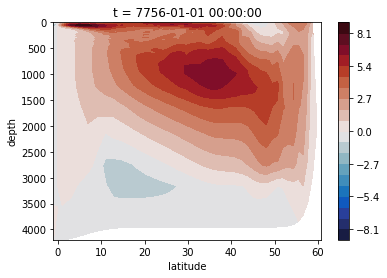

In [25]:
psi.coords['depth'] = mean_depth_isopycnal
psi.coords['phi'] = ds.gphif.isel({'x_f':0}).drop_vars('x_f')

psi[{'t':0}].plot.contourf(
    x='phi',
    y='depth',
    cmap=cm.cm.balance,
    levels=np.linspace(-9,9,21)
)

plt.gca().invert_yaxis()
plt.ylim(4200,0)

plt.ylabel('depth')
plt.xlabel('latitude')

Text(0.5, 0, 'latitude')

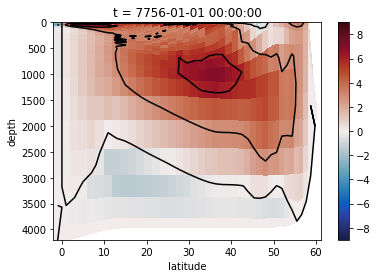

In [26]:
psi[{'t':0}].plot.pcolormesh(
    x='phi',
    y='depth',
    cmap=cm.cm.balance,
    vmin=-9,
    vmax=9
)

psi[{'t':0}].plot.contour(
    x='phi',
    y='depth',
    colors='k',
    levels=np.linspace(-9,9,7)
)

plt.gca().invert_yaxis()
plt.ylim(4200,0)

plt.ylabel('depth')
plt.xlabel('latitude')